# Data Mining and Machine Learning - Project

## Detecting Difficulty Level of French Texts

### Step by step guidelines

The following are a set of step by step guidelines to help you get started with your project for the Data Mining and Machine Learning class.
To test what you learned in the class, we will hold a competition. You will create a classifier that predicts how the level of some text in French (A1,..., C2). The team with the highest rank will get some goodies in the last class (some souvenirs from tech companies: Amazon, LinkedIn, etc).

**2 people per team**

Choose a team here:
https://moodle.unil.ch/mod/choicegroup/view.php?id=1305831


#### 1. 📂 Create a public GitHub repository for your team using this naming convention `DMML2022_[your_team_name]` with the following structure:
- data (folder)
- code (folder)
- documentation (folder)
- a readme file (.md): *mention team name, participants, brief description of the project, approach, summary of results table and link to the explainatory video (see below).*

All team members should contribute to the GitHub repository.

#### 2. 🇰 Join the competititon on Kaggle using the invitation link we sent on Slack.

Under the Team tab, save your team name (`UNIL_your_team_name`) and make sure your team members join in as well. You can merge your user account with your teammates in order to create a team.

#### 3. 📓 Read the data into your colab notebook. There should be one code notebook per team, but all team members can participate and contribute code.

You can use either direct the Kaggle API and your Kaggle credentials (as explained below and **entirely optional**), or dowload the data form Kaggle and upload it onto your team's GitHub repository under the data subfolder.

#### 4. 💎 Train your models and upload the code under your team's GitHub repo. Set the `random_state=0`.
- baseline
- logistic regression with TFidf vectoriser (simple, no data cleaning)
- KNN & hyperparameter optimisation (simple, no data cleaning)
- Decision Tree classifier & hyperparameter optimisation (simple, no data cleaning)
- Random Forests classifier (simple, no data cleaning)
- another technique or combination of techniques of your choice

BE CREATIVE! You can use whatever method you want, in order to climb the leaderboard. The only rule is that it must be your own work. Given that, you can use all the online resources you want.

#### 5. 🎥 Create a YouTube video (10-15 minutes) of your solution and embed it in your notebook. Explain the algorithms used and the evaluation of your solutions. *Select* projects will also be presented live by the group during the last class.


### Submission details (one per team)

1. Download a ZIPped file of your team's repository and submit it in Moodle here. IMPORTANT: in the comment of the submission, insert a link to the repository on Github.
https://moodle.unil.ch/mod/assign/view.php?id=1305833



### Grading (one per team)
- 20% Kaggle Rank
- 50% code quality (using classes, splitting into proper files, documentation, etc)
- 15% github quality (include link to video, table with progress over time, organization of code, images, etc)
- 15% video quality (good sound, good slides, interesting presentation).


## Some further details for points 3 and 4 above.


In [123]:
# read in your training data
import pandas as pd
import numpy as np
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, LabelEncoder
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn. preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import spacy
from spacy import displacy
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier


def evaluate(true, pred):
    precision = precision_score(true, pred, average='micro')
    recall = recall_score(true, pred, average='micro')
    f1 = f1_score(true, pred, average='micro')
    print(f"CONFUSION MATRIX:\n{confusion_matrix(true, pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(true, pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n\tPrecision: {precision:.4f}\n\tRecall: {recall:.4f}\n\tF1_Score: {f1:.4f}")


df = pd.read_csv('../data/training_data.csv')
X = df['sentence']
y = df.difficulty

# --Unlabeled--
df_unlabelled_test_data = pd.read_csv("../data/unlabelled_test_data.csv")

#sample
df_sample = pd.read_csv("../data/sample_submission.csv")

In [124]:
df_unlabelled_test_data

,id,sentence
0,0,Nous dûmes nous excuser des propos que nous eû...
1,1,Vous ne pouvez pas savoir le plaisir que j'ai ...
2,2,"Et, paradoxalement, boire froid n'est pas la b..."
3,3,"Ce n'est pas étonnant, car c'est une saison my..."
4,4,"Le corps de Golo lui-même, d'une essence aussi..."
...,...,...
1195,1195,C'est un phénomène qui trouve une accélération...
1196,1196,Je vais parler au serveur et voir si on peut d...
1197,1197,Il n'était pas comme tant de gens qui par pare...
1198,1198,Ils deviennent dangereux pour notre économie.


In [125]:
y.head()

0    C1
1    A1
2    A1
3    A1
4    B1
Name: difficulty, dtype: object

Have a look at the data on which to make predictions.

In [126]:
df_pred = pd.read_csv('../data/unlabelled_test_data.csv')
df_pred.head()

,id,sentence
0,0,Nous dûmes nous excuser des propos que nous eû...
1,1,Vous ne pouvez pas savoir le plaisir que j'ai ...
2,2,"Et, paradoxalement, boire froid n'est pas la b..."
3,3,"Ce n'est pas étonnant, car c'est une saison my..."
4,4,"Le corps de Golo lui-même, d'une essence aussi..."


And this is the format for your submissions.

In [127]:
df_example_submission = pd.read_csv('../data/sample_submission.csv')
df_example_submission.head()

,id,difficulty
0,0,A1
1,1,A1
2,2,A1
3,3,A1
4,4,A1


### 4. Train your models

Set your X and y variables.
Set the `random_state=0`
Split the data into a train and test set using the following parameters `train_test_split(X, y, test_size=0.2, random_state=0)`.



In [128]:
np.random.seed = 0
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#### 4.1.Baseline
What is the baseline for this classification problem?

In [129]:
y_train.value_counts(normalize=True)

A1    0.169792
C2    0.169010
B2    0.168750
B1    0.165365
A2    0.164323
C1    0.162760
Name: difficulty, dtype: float64

#### 4.2. Logistic Regression (without data cleaning)

Train a simple logistic regression model using a Tfidf vectoriser.

In [130]:
vect = TfidfVectorizer()
lr = LogisticRegression()

pipe = Pipeline([('vect', vect), ('lr', lr)])
pipe.fit(X_train, y_train)

Pipeline(steps=[('vect', TfidfVectorizer()), ('lr', LogisticRegression())])

Calculate accuracy, precision, recall and F1 score on the test set.

In [131]:
pred = pipe.predict(X_test)

evaluate(y_test, pred)
#Thus in binary classification, the count of true negatives is C00, false negatives is C10, true positives is C11 and false positives is C01 .

CONFUSION MATRIX:
[[93 31 21 10  4  2]
 [54 60 30  6  6  8]
 [12 38 64 17  9 20]
 [ 6  6 15 66 27 24]
 [ 4  4 10 37 73 45]
 [ 7  8  8 19 24 92]]
ACCURACY SCORE:
0.4667
CLASSIFICATION REPORT:
	Precision: 0.4667
	Recall: 0.4667
	F1_Score: 0.4667


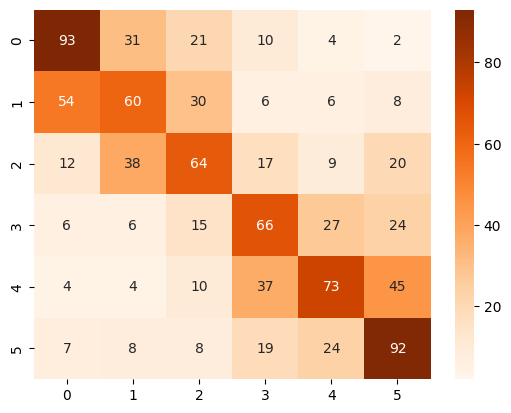

In [132]:
sns.heatmap(pd.DataFrame(confusion_matrix(y_test, pred)), annot=True, cmap='Oranges', fmt='.4g');

#add title, labels, ...

Have a look at the confusion matrix and identify a few examples of sentences that are not well classified.

In [133]:
inputs = X_test
labels = y_test

for input, prediction, label in zip(inputs, pred, labels):
    if prediction != label:
        print("---------------------------")
        print(input, "has been classified as ", prediction, "and should be ", label)


---------------------------
C'est en décembre 1967, après bien des invectives au Parlement, que sa loi relative à la régulation des naissances, dite loi Neuwirth est votée : elle autorise la vente exclusive des contraceptifs en pharmacie sur ordonnance médicale, avec autorisation parentale pour les mineures has been classified as  C2 and should be  C1
---------------------------
Giscard va pourtant réussir à transformer ce revers en tremplin has been classified as  B2 and should be  C1
---------------------------
Un choix difficile mais important : le public français écoute souvent les professionnels de Cannes pour choisir le film qu'il va aller voir au cinéma. has been classified as  B1 and should be  A2
---------------------------
Le débat porte plutôt sur l'utilité d'une telle mesure. has been classified as  C1 and should be  B1
---------------------------
Il faut du temps et du courage pour soigner toute cette ménagerie En plus des animaux, il faut aussi s'occuper du potager de mon

Generate your first predictions on the `unlabelled_test_data.csv`. make sure your predictions match the format of the `unlabelled_test_data.csv`.

In [134]:
col_id = pd.DataFrame(df_unlabelled_test_data.id)

col_id
prediction = pipe.predict(df_unlabelled_test_data.sentence)
df_lr = pd.DataFrame(prediction, columns=["difficulty"])
df_lr['id'] = col_id.id
df_lr = df_lr.iloc[:,[1,0]]



In [135]:
df_lr


,id,difficulty
0,0,C2
1,1,A2
2,2,A1
3,3,A1
4,4,C2
...,...,...
1195,1195,C2
1196,1196,A2
1197,1197,C2
1198,1198,C1


#### 4.3. KNN (without data cleaning)

Train a KNN classification model using a Tfidf vectoriser. Show the accuracy, precision, recall and F1 score on the test set.

In [136]:
knn = KNeighborsClassifier()

pipe = Pipeline([('vect', vect), ('knn', knn)])
pipe.fit(X_train, y_train)

pred = pipe.predict(X_test)

evaluate(y_test, pred)


CONFUSION MATRIX:
[[122  28   8   1   1   1]
 [ 98  51  12   1   1   1]
 [ 81  39  33   3   1   3]
 [ 49  30  19  29   3  14]
 [ 48  36  29  15  29  16]
 [ 37  29  17  23   9  43]]
ACCURACY SCORE:
0.3198
CLASSIFICATION REPORT:
	Precision: 0.3198
	Recall: 0.3198
	F1_Score: 0.3198


Try to improve it by tuning the hyper parameters (`n_neighbors`,   `p`, `weights`).

In [137]:
knn = KNeighborsClassifier(n_neighbors=4, p=2, weights='distance')
pipe = Pipeline([('vect', vect), ('knn', knn)])
pipe.fit(X_train, y_train)
pred = pipe.predict(X_test)
evaluate(y_test, pred)
print("-----------------------")

CONFUSION MATRIX:
[[116  27  14   1   1   2]
 [ 79  64  15   4   1   1]
 [ 65  38  44   8   2   3]
 [ 37  25  23  40   2  17]
 [ 37  30  23  26  36  21]
 [ 34  22  19  13  17  53]]
ACCURACY SCORE:
0.3677
CLASSIFICATION REPORT:
	Precision: 0.3677
	Recall: 0.3677
	F1_Score: 0.3677
-----------------------


In [138]:
# Checker !!!!!!!!!!!!!!!!


# Define parameters to test
#grid = {'n_neighbors':np.arange(1,15),
#        'p':np.arange(1,3),
#        'weights':['uniform','distance']
#       }
#
## Define and fit model
#knn = KNeighborsClassifier()
#knn_cv = GridSearchCV(knn, grid, cv=10)
#knn_cv.fit(X_train, y_train)
#
## Print results
#print("Hyperparameters:", knn_cv.best_params_)
#print("Train Score:", round(knn_cv.best_score_, 4))
#print("Test Score:", round(knn_cv.score(X_test, y_test), 4))

#### 4.4. Decision Tree Classifier (without data cleaning)

Train a Decison Tree classifier, using a Tfidf vectoriser. Show the accuracy, precision, recall and F1 score on the test set.

In [139]:
tree = DecisionTreeClassifier(random_state=0)

pipe = Pipeline([('vect', vect), ('tree', tree)])
pipe.fit(X_train, y_train)

pred = pipe.predict(X_test)

evaluate(y_test, pred)



CONFUSION MATRIX:
[[78 38 25 11  2  7]
 [49 54 33 18  3  7]
 [24 41 37 25 18 15]
 [10 20 30 38 24 22]
 [ 8 19 31 39 39 37]
 [15 13 28 33 30 39]]
ACCURACY SCORE:
0.2969
CLASSIFICATION REPORT:
	Precision: 0.2969
	Recall: 0.2969
	F1_Score: 0.2969


Try to improve it by tuning the hyper parameters (`max_depth`, the depth of the decision tree).

In [140]:
# CHECKER !!!!!!!!!!!!!!!!!!!!!!!!!!!

tree = DecisionTreeClassifier(max_depth=50, random_state=0)

pipe = Pipeline([('vect', vect), ('tree', tree)])
pipe.fit(X_train, y_train)

pred = pipe.predict(X_test)

evaluate(y_test, pred)



CONFUSION MATRIX:
[[85 31 31  4  2  8]
 [45 54 38 15  7  5]
 [28 40 41 18 18 15]
 [ 8 21 27 41 25 22]
 [10 23 31 39 41 29]
 [18 10 25 36 30 39]]
ACCURACY SCORE:
0.3135
CLASSIFICATION REPORT:
	Precision: 0.3135
	Recall: 0.3135
	F1_Score: 0.3135


#### 4.5. Random Forest Classifier (without data cleaning)

Try a Random Forest Classifier, using a Tfidf vectoriser. Show the accuracy, precision, recall and F1 score on the test set.

In [141]:
rfc = RandomForestClassifier()

pipe = Pipeline([('vect', vect), ('rfc', rfc)])
pipe.fit(X_train, y_train)

pred = pipe.predict(X_test)

evaluate(y_test, pred)


CONFUSION MATRIX:
[[125  16  13   3   3   1]
 [ 80  51  24   6   2   1]
 [ 35  39  54  19   5   8]
 [ 22  16  15  59  21  11]
 [ 22  12  15  59  39  26]
 [ 21   6  15  28  20  68]]
ACCURACY SCORE:
0.4125
CLASSIFICATION REPORT:
	Precision: 0.4125
	Recall: 0.4125
	F1_Score: 0.4125


#### 4.6. Any other technique, including data cleaning if necessary

Try to improve accuracy by training a better model using the techniques seen in class, or combinations of them.

As usual, show the accuracy, precision, recall and f1 score on the test set.

In [ ]:
# your code here

#### 4.7. Show a summary of your results